# Data Loading

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
bos = pd.DataFrame(boston.data)
print(bos.head())
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


# Split Dataset into train and test

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import warnings
# =============================================================================================
warnings.filterwarnings("ignore")
# split the data set into train and test
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
X_train = X_train.values
X_test  = X_test.values
Y_train  = Y_train.values
Y_test  = Y_test.values

# Column Standardization

In [4]:
# Column Standardization
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test =scaler.transform(X_test)

# scikit-learn SGD Regression

Root Mean Squared Error 8.554958644709568


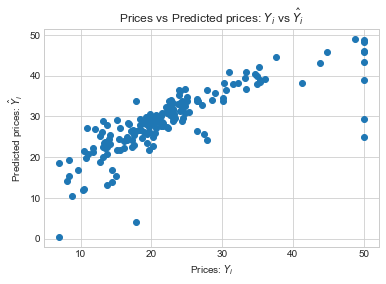

In [308]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

lm = SGDRegressor()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print('Root Mean Squared Error',np.sqrt(mse))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [309]:
lm.get_params

<bound method BaseEstimator.get_params of SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)>

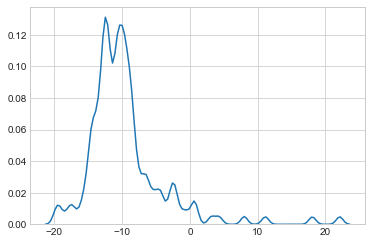

In [20]:
#plotting kdeplot for delta_y
import seaborn as sns;
import numpy as np;
delta_y = Y_test - Y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

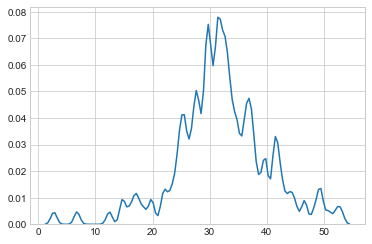

In [21]:
#plotting kdeplot for y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()

# SGD Implementation

In [22]:
from sklearn.metrics.pairwise import euclidean_distances
dimensions =13
def dL_dW(X,e,N):
    return (-2/N)*np.sum(X.T.dot(e))
def dL_db(e,N):
    return (-2/N)*np.sum(e)
def gradient_descent(learning_rate =0.0001,no_iterations =1000,batch_size=10,decay=0.5):
    N = batch_size
    initial_w = np.random.randn(dimensions,1)
    initial_b = np.random.randn()
    ws = [initial_w]
    bs = [initial_b]
    optimal_w = []
    optimal_b = []
    for j in range(no_iterations):
        indices = np.random.choice(len(X_train),batch_size,replace=False)
        e= Y_train[indices]-(X_train[indices].dot(ws[j])+bs[j])
        w = ws[j]-learning_rate*dL_dW(X_train[indices],e,N)
        b = bs[j] - learning_rate*dL_db(e,N)
        ws.append(np.copy(w))
        bs.append(np.copy(b))
        if(ws[j+1]==ws[j]).all() and bs[j+1]==bs[j]:
            optimal_w = ws[j+1]
            optimal_b = bs[j+1]
            break
        learning_rate = learning_rate*decay
    return optimal_w,optimal_b

In [23]:
w,b = gradient_descent()

Root Mean Squared Error 8.622344756051696


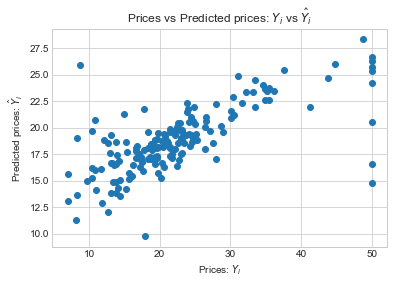

In [24]:
from sklearn.metrics import mean_squared_error
Y_pred_sgd = []
for i in range(0,167):
    Y_pred_sgd.append(np.asscalar((X_test[i].dot(w))+b))
mse = mean_squared_error(Y_test, Y_pred_sgd)
print('Root Mean Squared Error',np.sqrt(mse))
plt.scatter(Y_test, Y_pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

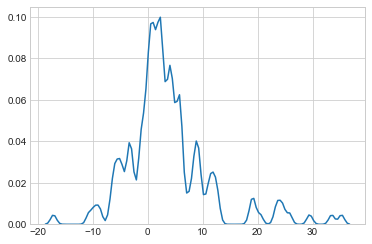

In [26]:
import seaborn as sns;
import numpy as np;
delta_y = Y_test - Y_pred_sgd
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

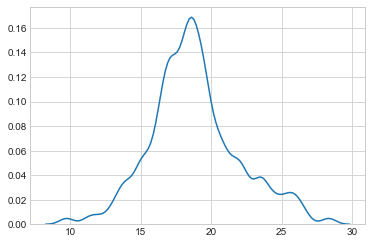

In [27]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred_sgd), bw=0.5)
plt.show()

# Conclusion

In [311]:
from prettytable import PrettyTable
t = PrettyTable()
t.field_names = ['Model', 'learning rate','Root Mean Sqared Error']
t.add_row(["SKLearn SGD Regression","0.0001","8.554958644709568"])
t.add_row(["Manual SGD","0.0001","8.622344756051696"])
print(t)

+------------------------+---------------+------------------------+
|         Model          | learning rate | Root Mean Sqared Error |
+------------------------+---------------+------------------------+
| SKLearn SGD Regression |     0.0001    |   8.554958644709568    |
|       Manual SGD       |     0.0001    |   8.622344756051696    |
+------------------------+---------------+------------------------+
